## Import Modules

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data OverView

In [37]:
df=pd.read_csv('Fish.csv')
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


In [38]:
df.tail()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2
158,6,Smelt,19.9,2.9322,1.8792,13.8,15.0,16.2


With a dataset of fish species, with some of it characteristic like it vertical, diagonal, length, height, and width. We will try to predict the weight of the fish based on their characteristic.

Species: Species name of fish                                                                                                
Weight: Weight of fish in gram                                                                                                 
Length1: Vertical length in cm                                                                                                   
Length2: Diagonal length in cm                                                                                                 
Length3: Cross length in cm                                                                                                    
Height: Height in cm                                                                                                                
Width: Diagonal width in cm

In [39]:
df.shape

(159, 8)

In [40]:
df.columns

Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

In [41]:
df['Category'].value_counts()

Category
3    56
1    35
5    20
4    17
6    14
2    11
7     6
Name: count, dtype: int64

In [42]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

## Data Cleaning

In [43]:
df.nunique()

Category      7
Species       7
Weight      101
Height      154
Width       152
Length1     116
Length2      93
Length3     124
dtype: int64

In [44]:
df.isnull()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False,False


In [45]:
df.isna().sum()

Category    0
Species     0
Weight      0
Height      0
Width       0
Length1     0
Length2     0
Length3     0
dtype: int64

In [46]:
df.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


## Data Visualisation

In [48]:
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


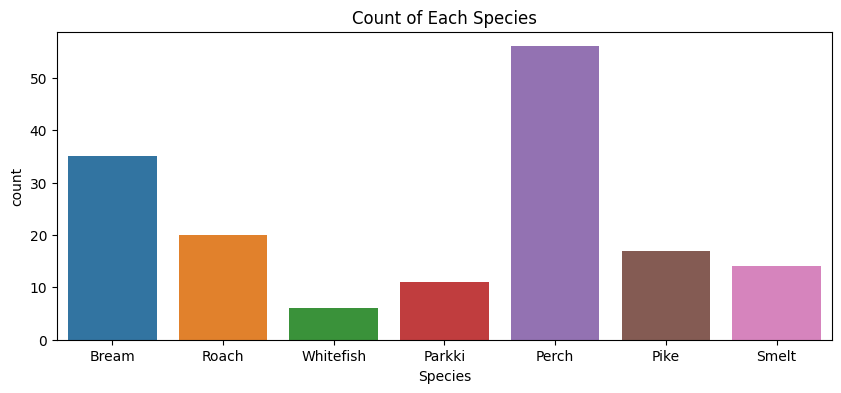

In [49]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['Species'])
plt.title('Count of Each Species')
plt.show()

In [52]:
body_ob=df.groupby('Species')[['Weight','Height','Width']].mean().reset_index()
body_ob

,Species,Weight,Height,Width
0,Bream,617.828571,15.183211,5.427614
1,Parkki,154.818182,8.962427,3.220736
2,Perch,382.239286,7.861870,4.745723
3,Pike,718.705882,7.713771,5.086382
4,Roach,152.050000,6.694795,3.657850
5,Smelt,11.178571,2.209371,1.340093
6,Whitefish,531.000000,10.027167,5.473050


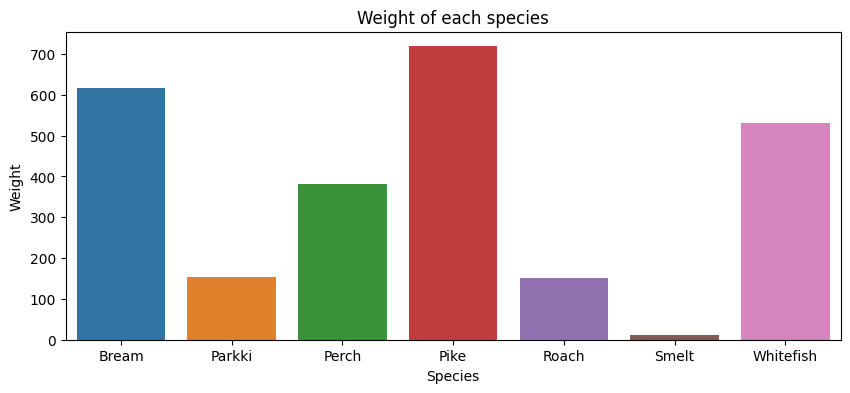

In [64]:
plt.figure(figsize=(10,4))
sns.barplot(x=body_ob['Species'],y=body_ob['Weight'])
plt.title('Weight of each species')
plt.show()

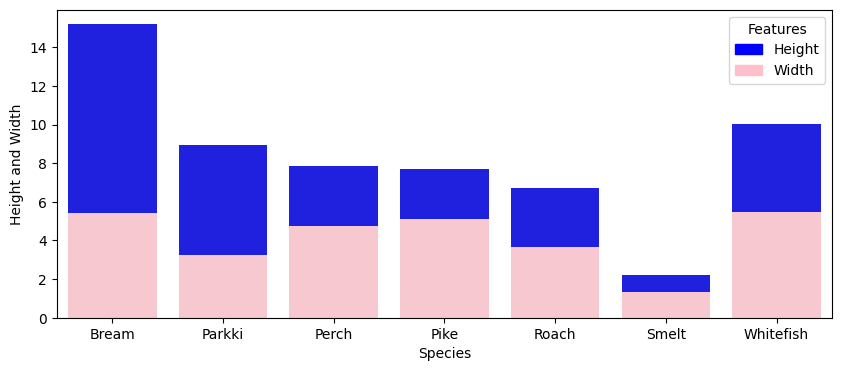

In [72]:
from matplotlib.patches import Patch
plt.figure(figsize=(10,4))
sns.barplot(x=body_ob['Species'],y=body_ob['Height'],color='blue')
sns.barplot(x=body_ob['Species'],y=body_ob['Width'],color='pink')
plt.ylabel('Height and Width')
legend_handles = [Patch(color='blue', label='Height'),
                  Patch(color='pink', label='Width')]
plt.legend(handles=legend_handles, title='Features')
plt.show()

<Figure size 2000x1000 with 0 Axes>

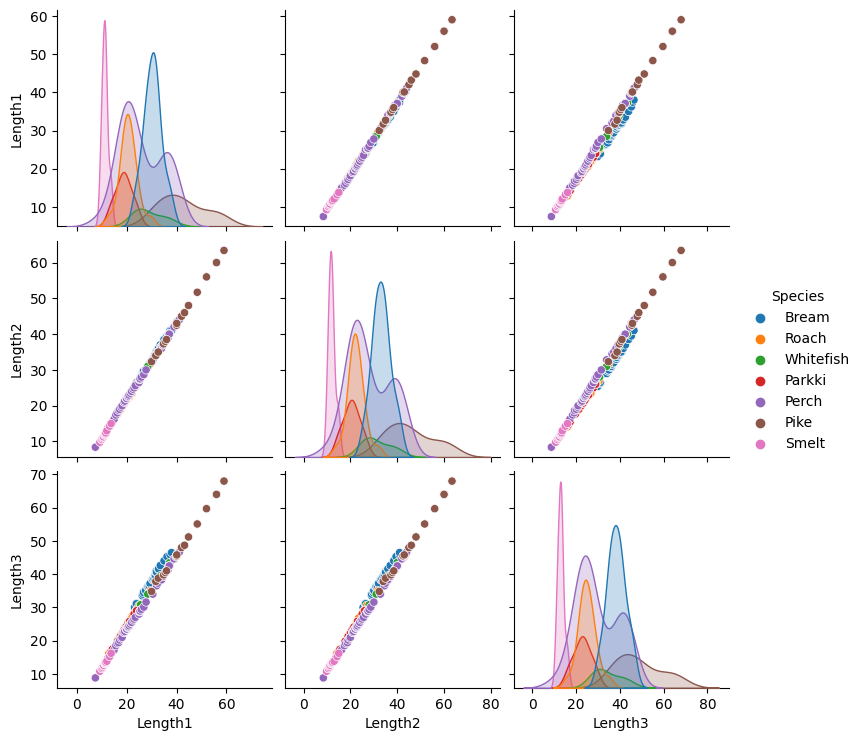

In [77]:
features = ['Length1','Length2','Length3','Species']
plt.figure(figsize=(20, 10))
sns.pairplot(df[features],hue='Species')
plt.show()

## Fish Weight Prediction

In [78]:
df

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...,...,...
154,6,Smelt,12.2,2.0904,1.3936,11.5,12.2,13.4
155,6,Smelt,13.4,2.4300,1.2690,11.7,12.4,13.5
156,6,Smelt,12.2,2.2770,1.2558,12.1,13.0,13.8
157,6,Smelt,19.7,2.8728,2.0672,13.2,14.3,15.2


In [79]:
X=df.drop(columns=['Species','Weight'])
Y=df['Weight']

In [80]:
X

,Category,Height,Width,Length1,Length2,Length3
0,1,11.5200,4.0200,23.2,25.4,30.0
1,1,12.4800,4.3056,24.0,26.3,31.2
2,1,12.3778,4.6961,23.9,26.5,31.1
3,1,12.7300,4.4555,26.3,29.0,33.5
4,1,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...
154,6,2.0904,1.3936,11.5,12.2,13.4
155,6,2.4300,1.2690,11.7,12.4,13.5
156,6,2.2770,1.2558,12.1,13.0,13.8
157,6,2.8728,2.0672,13.2,14.3,15.2


In [81]:
Y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split

In [94]:
# train and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [95]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(127, 6) (32, 6) (127,) (32,)


## Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model_LR=LinearRegression()
model_LR.fit(X_train,Y_train)

LinearRegression()

In [98]:
model_LR.coef_

array([ 30.67215399,  44.64275364,   8.12607271,   5.91142869,
        63.18434302, -45.95358687])

In [99]:
model_LR.intercept_

-657.0329255783242

In [100]:
print("Training Score : ",model_LR.score(X_train,Y_train))
print("Test Score : ",model_LR.score(X_test,Y_test))

Training Score :  0.8944697968655531
Test Score :  0.8890588326599025


In [118]:
y_predicted=model_LR.predict(X_test)
y_predicted

array([ 682.98280214,  514.92635924,  695.04895016,  426.23928406,
        587.85837897,  962.7797097 ,  284.01041499,  916.92984751,
        673.11715654,  123.23324402,  400.48046052, -168.52914551,
         76.81935217, -153.35075331,  124.1474272 , -208.97819757,
        278.0219754 ,  163.81518279,  815.50525094, -186.04996614,
        890.51850818,  638.78721283,  172.48834453,  156.3412157 ,
        832.35354092,  154.27894923,  388.05743974,  901.93112875,
        776.99981879,  356.87411717, 1125.22374446,  148.5230584 ])

In [119]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

In [120]:
mean_absolute_percentage_error(Y_test,y_predicted)

2.42755763791056e+16

In [121]:
mean_absolute_error(Y_test,y_predicted)

91.20577582359172

## Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor()
model_RF.fit(X_train,Y_train)
print("Training Score : ",model_RF.score(X_train,Y_train))
print("Test Score : ",model_RF.score(X_test,Y_test))

Training Score :  0.9961933711082562
Test Score :  0.9857969125602306


In [123]:
y_predicted=model_RF.predict(X_test)
y_predicted

array([ 688.73 ,  474.92 ,  719.55 ,  274.71 ,  668.78 ,  980.3  ,
        277.75 , 1011.15 ,  705.34 ,  115.75 ,  298.39 ,    8.919,
         83.25 ,   10.051,  119.01 ,    7.5  ,  197.06 ,  128.55 ,
        707.15 ,    7.791,  961.74 ,  493.2  ,  129.82 ,  113.04 ,
        886.15 ,  126.3  ,  378.48 ,  949.3  ,  495.59 ,  270.66 ,
       1543.7  ,  125.57 ])

In [124]:
mean_absolute_percentage_error(Y_test,y_predicted)

1.827054073828868e+16

In [125]:
mean_absolute_error(Y_test,y_predicted)

29.869468749999996